Osnabrück University - A&C: Computational Cognition (Summer Term 2019)

# Exercise Sheet 08: Neural Time Series Data - Part 1

## Introduction

This week's sheet should be solved and handed in at 14:00, on Tuesday 11th of May. If you need help (and Google and other resources were not enough), feel free to contact your tutors. Please push your results to your Github group folder.

In this exercise sheet you will start to analyse neural time series data, i.e. EEG Data. As introduction to 'real' EEG data anaylsis, we will first create and work with artificial signals, in order to better understand the processing procedures. Step by step, we will make our signal more complex, approxiamting real EEG data. Next week, we will then start to take this knowledge in order analyse real EEG Data, recorded by a Neurobiopsychology research group of our institute.

For the following exercises, we will use the signal processing toolbox from [scipy](https://docs.scipy.org/doc/scipy/reference/signal.html). In this documentation, you can find almost all the functions that you need to solve the tasks.

In [1]:
# for more interactive plots, uncomment the follwing line
# %matplotlib qt5 


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy
from scipy import signal

# set the default back- and foreground color for all the plots
plt.rcParams['axes.facecolor'] = 'lightcyan'

## Assignment 0: Peer review for sheet 01 [3 pts]

Again, you will have to make a peer review of the other groups' solutions. Each group reviews the solutions of two other groups and give points according to the given point distribution considering the correctness of the solution. For this reviews the tutors will give you up to 3 points each week.

| * |Group 1|Group 2|Group 3|Group 4|Group 5|Group 6|Group 7|Group 8|Group 9|Group 10|Group 11|
| ------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ------ | ------ |
| check solutions of group: | 9, 5 | 7, 10 | 10, 8  | 8, 3 | 3, 1 | 9, 4  | 6, 4 | 2, 11  | 1, 6  | 11, 7   | 5, 2   |

## Assignment 1: Create and filter simple signals [5 pts]

### a) Simple Sinewave [2 pts]
As a first step we will create a simple signal by combining two single sinusoids. For this:  
- Define a time scale of 1 second, i.e. 1000ms
- Create two sinewaves with a length of 1s: one with a frequency of 10Hz and one with 20Hz
- Then add them together to create your first simple signal
- Plot all three figures

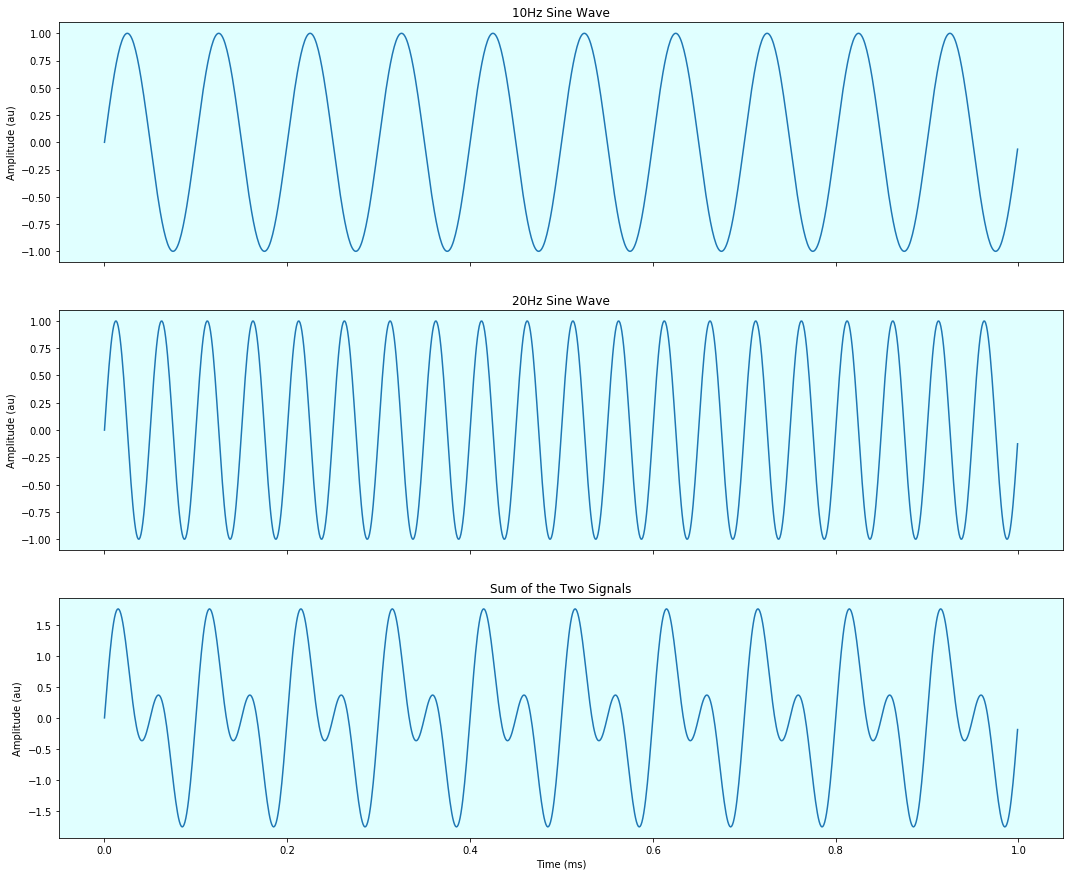

In [3]:
# define the time scale of 1 sec by 1 ms accuracy
t = np.linspace(0, 1, 1000, endpoint=False)

# set two sine waves with the frequencies of 10 & 20Hz
sin1 = np.sin(2 * np.pi * 10 * t)
sin2 = np.sin(2 * np.pi * 20 * t)

sig = sin1+sin2

# set the space for three plots
figs, axes = plt.subplots(nrows=3, sharex=True, figsize=(18,15))

# plot three waves
axes[0].plot(t, sin1)
axes[1].plot(t, sin2)
axes[2].plot(t, sig)

# set the labels
axes[0].title.set_text('10Hz Sine Wave')
axes[0].set_ylabel('Amplitude (au)')
axes[1].title.set_text('20Hz Sine Wave')
axes[1].set_ylabel('Amplitude (au)')
axes[2].title.set_text('Sum of the Two Signals')
axes[2].set_xlabel('Time (ms)')
axes[2].set_ylabel('Amplitude (au)');



### b) More complex Signal [2 pts]

Next, we want to achieve something more complex: For this, we select a list of frequencies, that we want our signal to be composed of, and define their amplitueds and their phases. In the following, we have predefined the values that you should use for this.
With the help of these parameters:
- Create a new, a bit more complex signal by combining the resulting sinusoids (you should get 5 sinusoids with the respective *frequ*, *amplit* and *phase*)
- To make it more realistic, create some random Gaussian noise with the same length and add it to your signal
- Then plot both, the clean and the noisy signal

The given Nyquist Frequency *nyq* results from the **nyquist sampling theorem**: It states that in order to prevent distortions of the underyling information, the minimum sampling frequency of a signal (in our case 1000Hz) should be double the frequency of its highest frequency component (i.e. 500Hz).

In [4]:
# set parameters:
srate = 1000 # define sampling rate (signal length = 1s)
nyq = srate/2 # nyquist frequency
frex = [3, 10, 5, 15, 35, 60] # define a list of frequencies
amplit = [5, 15, 10, 5, 7, 1] # define their amplitudes
phases = [np.pi/7, np.pi/8, np.pi, np.pi/2, -np.pi/4, np.pi/3] # and their respective phases


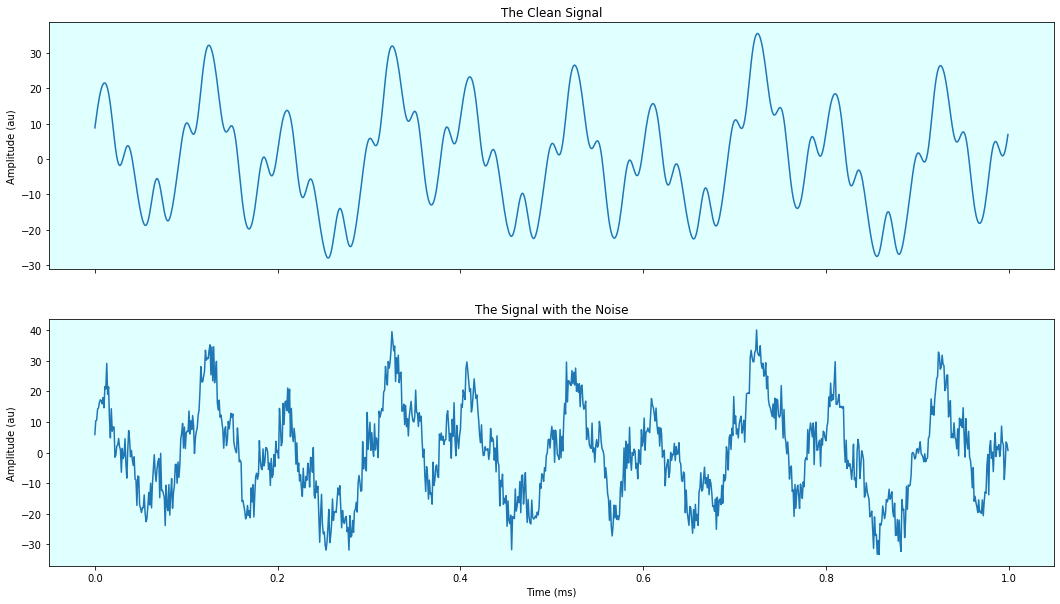

In [5]:
# create and plot signal (with and gaussian noise)

# set the timeline
t = np.linspace(0, 1, 1000, False)  # 1 second

# create the signal, by adding three list values in trio lists
sig = sum([trio[1] * np.sin(2 * np.pi * t * trio[0] + trio[2]) for trio in list(zip(frex, amplit, phases))])

# create Gaussian noise
noise = np.random.normal(0, 4, 1000)
# and add it to the signal
sig_noisy = sig + noise

# set the space for three plots
figs, axes = plt.subplots(nrows=2, sharex=True, figsize=(18,10))

# plot two waves
axes[0].plot(t, sig)
axes[1].plot(t, sig_noisy)

# set the labels
axes[0].title.set_text('The Clean Signal')
axes[0].set_ylabel('Amplitude (au)')
axes[1].title.set_text('The Signal with the Noise')
axes[1].set_xlabel('Time (ms)')
axes[1].set_ylabel('Amplitude (au)');


### c) Frequency spectrum with FFT [1 pt]
As a next step, we will do a fast Fourier Transform on our signals, in order to get its frequency spectrum. With this, we can check whether it shows all the frequencies that we used to compose it. 
As we will have to compute the frequency spectrum several times, it will be useful to write a function that computes the fourier transform of any signal.
Then compute and plot the FFT of the noisy signal brom 1b).   
If you look at the amplitudes, you will realize that they are half the amplitudes that we predefined when creating the signal. This happens because we are only taking the absolute values of the FT-frequencies.

In [6]:
def getFT(sig):
    '''
    This function takes a signal and computes its fast Fourier transform
    and returns the 'plot' for fft.
    '''
    # get the length of our signal for a proportionate plot
    xf = len(sig) // 2 # but we just need half of it
    
    # compute the fast Fourier transform
    # and normalize it with the length of the signal
    yf = np.fft.fft(sig) / len(sig)

    # return two ranges of values for fft plot axes
    return range(xf), np.abs(yf[0:xf])


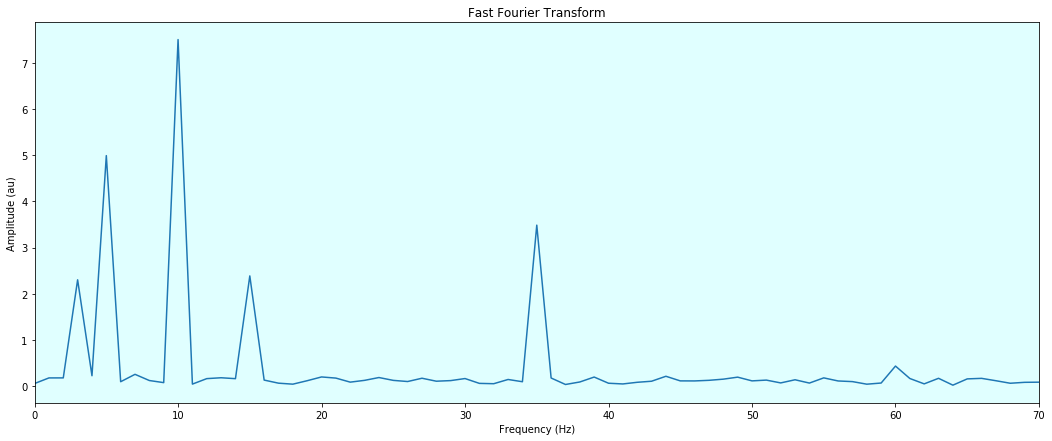

In [7]:
# compute FFT of the noisy signal
xf, yf = getFT(sig_noisy)

# set the figure sizes and the labels
plt.figure(figsize=(18,7))
plt.title('Fast Fourier Transform')
plt.xlim(0,70)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (au)')

# plot the fft
plt.plot(xf, yf);


## Assignment 2: Filtering in the time-domain vs. filtering in the freuquency-domain [5]
**Convolution theorem:**  
Convolution in the time domain is the same as multiplication in the frequency domain.  

"**Convolution** is used to isolate frequency-band-specific activity and to localize that frequency-band-specific activity in time.  
This is done by convolving wavelets— time-limited sine waves—with EEG data. As the wavelet (the convolution kernel) is dragged along the EEG data (the convolution signal): it reveals when and to what extent the EEG data contain features that look like the wavelet. When convolution is repeated on the same EEG data using wavelets of different frequencies, a time-frequency representation can be formed." (*Mike X Cohen, Analyzing Neural Time Series Data: Theory and Practice*) 

--> to get to know more about convolution I can highly recommend [this](http://mikexcohen.com/lectures.html) video by Mike X Cohen.

### a) Filter in the time domain [3 pts]
To filter our signal in the time domain, we use a windowed sinewave as a filter-kernel. The windowing helps to obtain temporally localized frequency information. We then convolve our constructed wavelet with our signal, extracting the frequency band that we want to work with. 
- First define your pass-band as 25Hz. Ideally everything above this frequency is filtered out, in reality however, we need a transition band of about 10 Hz, or a region between the pass-frequency *f_p* and stop-frequency *f_s*. In this range, frequencies are only attenuated but are not completely excluded. We need this in order to account for the trad-off between precision in the frequency-domain and precision in the time-domain.
- Next, we define the gains of each frequency band: everything outside 0 and our pass-band of 25Hz should be attenuated, i.e. a gain of 0
- Using the function [firwin2](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.firwin2.html) of the signal package and the parameters from above, now construct your filter-kernel *h_win* (the result will be a wavelet with a length of 1s) 
- Plot your kernel as well as it's frequency spectrum. It should look like a step-function, that assigns a gain of 1 to all frequencies in our pass-band of 0-25Hz

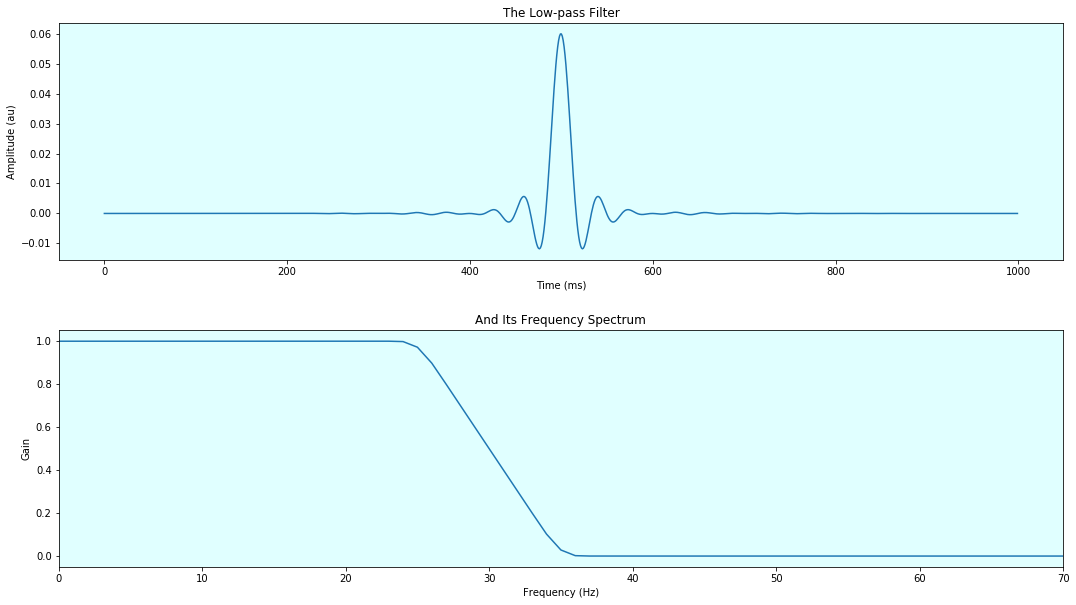

In [8]:
# Create the Low-pass Filter with a Windowed 10-Hz transition (0.5 sec)
# ---------------------------------------------------------------------
f_p = 25. # define passband
trans_bandwidth = 10.  # 10 Hz transition band
f_s = f_p + trans_bandwidth  # stopband = 35 Hz

# define gains of each frequency band
freq = [0., f_p, f_s, nyq]
gain = [1., 1., 0., 0.]

# compute filter graph with firwin2
h_win = signal.firwin2(srate, freq, gain, window='hamming', nyq=nyq, antisymmetric=False)

# compute frequency spectrum
_, yf_filter = getFT(h_win)


# Plot the Filter and Its Frequency Spectrum
# ------------------------------------------
# set the space for two plots
figs, axes = plt.subplots(nrows=2, figsize=(18,10))
plt.subplots_adjust(hspace=0.3)

# plot two waves
axes[0].plot(h_win)
# make the y-tick labels meaningful, using gain vector
yf_f = np.dot(yf_filter, srate)
axes[1].plot(yf_f)

# set the labels and stuff
axes[0].title.set_text('The Low-pass Filter')
axes[0].set_xlabel('Time (ms)')
axes[0].set_ylabel('Amplitude (au)')
axes[1].title.set_text('And Its Frequency Spectrum')
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Gain')
axes[1].set_xlim(0,70);



Now we are ready to convolve our signal with our self-constructed FIR filter. For this, we use the [convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html) function of the *signal* package. 
Aftwards, we want to see in the frequency-spectrum whether our filter successfully attenuated the frequency-components above 25Hz. For this, compute and plot the FT of both, the filtered and the unfiltered signal.  
Here you might notice that the huge peak at 35Hz from before filtering is still apparent as a small bumb, since this component was only attenuated, not completely eliminated.   
In order to compare which filtering procedure is faster, record the computation-time of the time-domain convolution with the help of the magic function *%timeit* (you will have to write an extra line for this).

565 µs ± 73.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


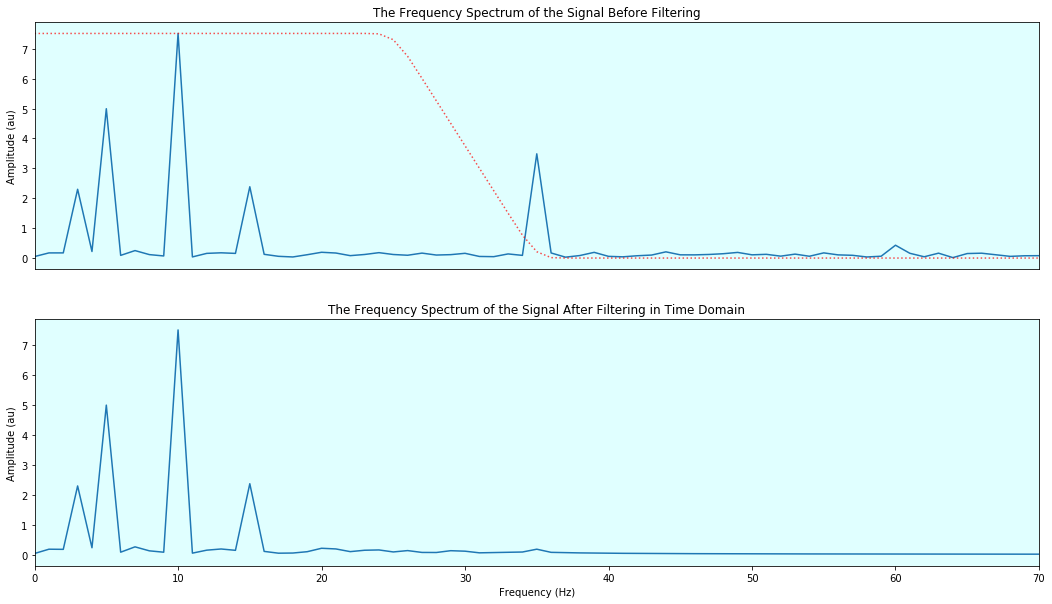

In [9]:
# convole/filter of the noisy signal with our low-pass filter
conv = signal.convolve(sig_noisy, h_win, mode='same')

# calculate the frequency spectrum of the noisy signal before filtering
_, yf_unfiltered = getFT(sig_noisy)

# calculate the frequency spectrum of the noisy signal after filtering
_, yf_filtered_t_domain = getFT(conv)


# set the space for two plots
figs, axes = plt.subplots(nrows=2, figsize=(18,10))

# plot two frequency spectra
axes[0].plot(yf_unfiltered)
axes[0].plot(yf_f * max(yf_unfiltered), 'r:', alpha=.7) # superimpose the filter signal
axes[1].plot(yf_filtered_t_domain) 

# set the labels and stuff
axes[0].title.set_text('The Frequency Spectrum of the Signal Before Filtering')
axes[0].set_xticks([])
axes[0].set_ylabel('Amplitude (au)')
axes[0].set_xlim(0,70)
axes[1].title.set_text('The Frequency Spectrum of the Signal After Filtering in Time Domain')
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Amplitude (au)')
axes[1].set_xlim(0,70);


# measure the time required for the convolution in time domain
%timeit conv = signal.convolve(sig_noisy, h_win, mode='same')


### b) Filter in the frequency domain [2 pts]
Filtering in the frequency domain is computationally much faster and easier. According to the convolution theorem (see above), we just have to multiply the frequency-spectrum of our filter-kernel with the frequency-spectrum of our signal.
After frequency-domain filtering, plot again the frequency response of your filter together with the filtered and the unfiltered signal. 

Again, in order to compare which filtering procedure is faster, record the computation-time of the frequency-domain filtering with the help of the magic function *%timeit*. Then compare it to the computation time of the time-domain convolution. Which one is faster?

1.29 µs ± 33.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


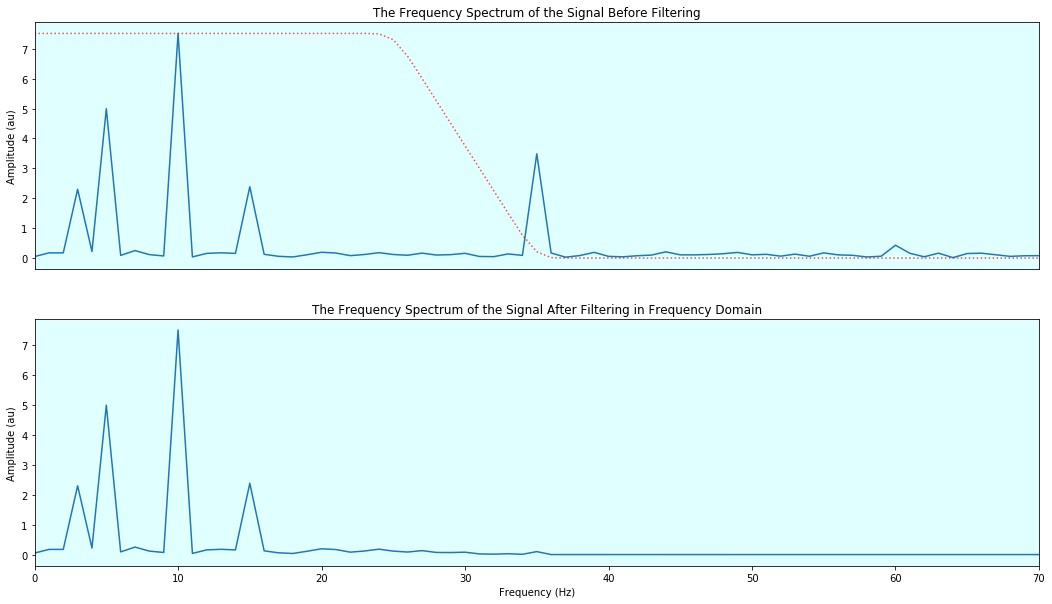

In [10]:
# multiply the noisy signal and our low-pass filter frequency spectra
yf_filtered_f_domain = yf_filter * yf_unfiltered


# set the space for two plots
figs, axes = plt.subplots(nrows=2, figsize=(18,10))

# plot two frequency spectra
axes[0].plot(yf_unfiltered)
axes[0].plot(yf_f * max(yf_unfiltered), 'r:', alpha=.7) # superimpose the filter signal
axes[1].plot(yf_filtered_f_domain * srate) # plus adapt other plots' y_ticks scale

# set the labels and stuff
axes[0].title.set_text('The Frequency Spectrum of the Signal Before Filtering')
axes[0].set_xticks([])
axes[0].set_ylabel('Amplitude (au)')
axes[0].set_xlim(0,70)
axes[1].title.set_text('The Frequency Spectrum of the Signal After Filtering in Frequency Domain')
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Amplitude (au)')
axes[1].set_xlim(0,70);

# measure the time required for the multiplication in frequency domain
%timeit yf_filtered_f_domain = yf_filter * yf_unfiltered


### On Covolution and Multipication Speed

**Computing the multiplication of two signals in frequency domain is way faster than calculating their convolution in the time domain.**

In order to compare the filtered and the unfiltered signal in the time-domain, first compute the inverse Fourier-Transform of your convolution result and then plot both signals (unfiltered and filtered) in two separate plots.  

In a second plot, compare your result from filtering in the frequency domain with result from convolution in the time domain (from 2a). Notice how both plots look different, although be basically applied the same filter. This is due to filtering artifacts, which will be further discussed in the lecture.


**I don't get it! Why should I calculate inverse fft, while I have the original convoluted signal?**

**PS. I just checked the solution sheet and you did not compare conv_in_time! You used conv_in_freq (which is by the way not an accurate name, cause here we only have multiplication in the frequency domain).**

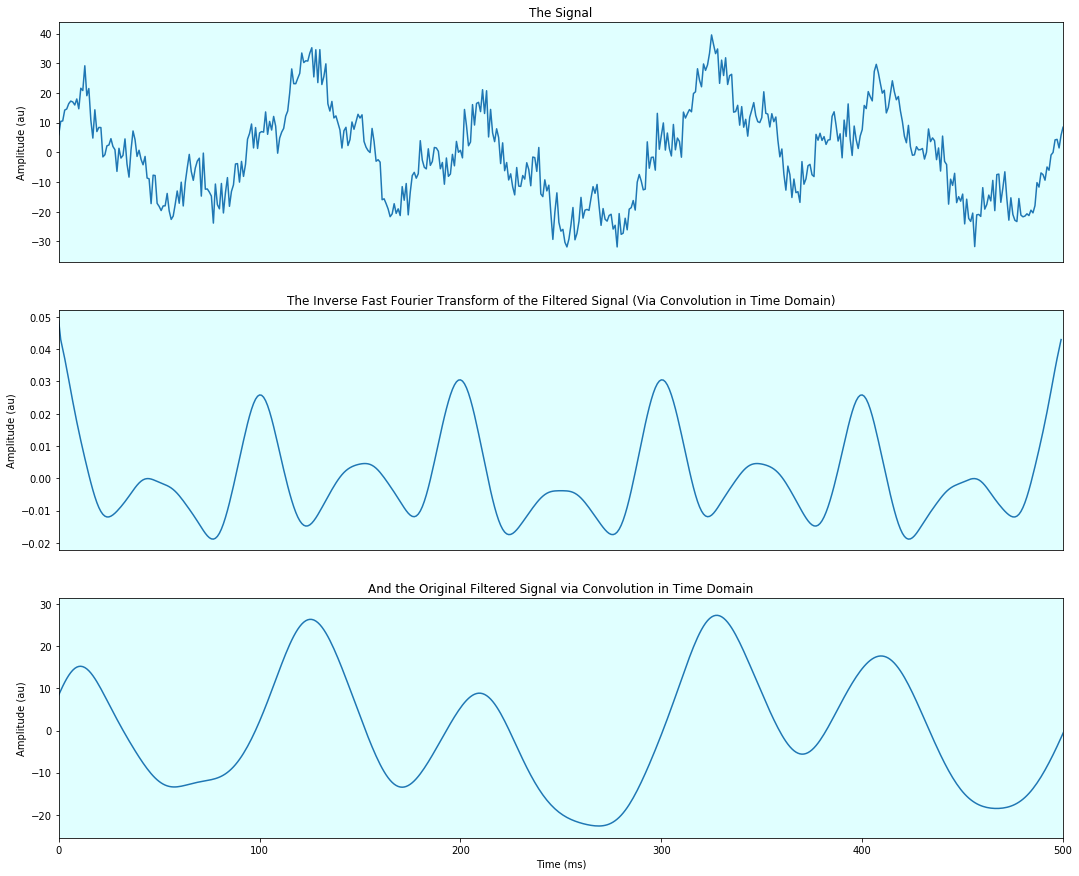

In [11]:
# compute the inverse Fourier transform of the convolution in time domain
inv_fft_td = np.fft.ifft(yf_filtered_t_domain)

# set the space for three plots
figs, axes = plt.subplots(nrows=3, figsize=(18,15))

# plot the signal, its ifft after fft of its convoltion, and its convolution
axes[0].plot(sig_noisy)
axes[1].plot(np.real(inv_fft_td))
axes[2].plot(conv)

# set the labels and stuff
axes[0].title.set_text('The Signal')
axes[0].set_xticks([])
axes[0].set_ylabel('Amplitude (au)')
axes[0].set_xlim(0,500)
axes[1].title.set_text('The Inverse Fast Fourier Transform of the Filtered Signal (Via Convolution in Time Domain)')
axes[1].set_xticks([])
axes[1].set_ylabel('Amplitude (au)')
axes[1].set_xlim(0,500)
axes[2].title.set_text('And the Original Filtered Signal via Convolution in Time Domain')
axes[2].set_xlabel('Time (ms)')
axes[2].set_ylabel('Amplitude (au)')
axes[2].set_xlim(0,500);


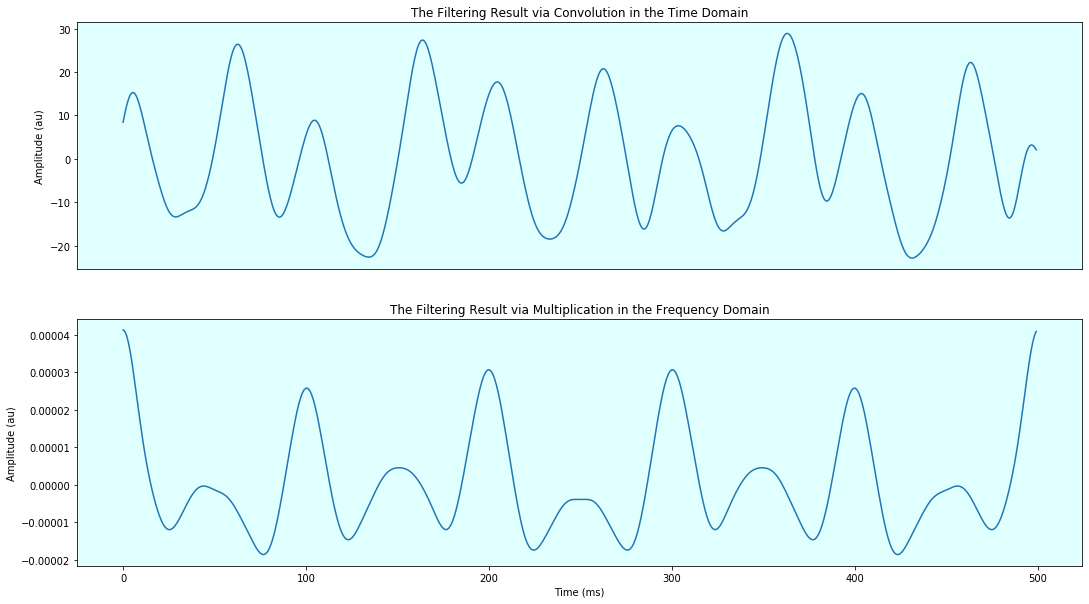

In [12]:
# the filtered version of singnal via convolution in the time domain
conv;

# the filtered version of singnal via multiplication in the frequency domain
inv_fft_fd = np.fft.ifft(yf_filtered_f_domain)


# set the space for two plots
figs, axes = plt.subplots(nrows=2, figsize=(18,10))

# plot the filtered signal,
axes[0].plot(conv) #np.real(inv_fft_td)) # via convolution in the time domain, and
axes[1].plot(np.real(inv_fft_fd)) # via multiplication in the frequency domain

# set the labels and stuff
axes[0].title.set_text('The Filtering Result via Convolution in the Time Domain')
axes[0].set_xticks([])
axes[0].set_ylabel('Amplitude (au)')
axes[1].title.set_text('The Filtering Result via Multiplication in the Frequency Domain')
axes[1].set_xlabel('Time (ms)')
axes[1].set_ylabel('Amplitude (au)');

